# Exploratory Data Analyses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#Import .csv file as Pandas DataFrame
data = pd.read_csv("../../data/raw/sa_exercise_file.csv")

In [4]:
data.head()

,input country code,Primary Phone to Name,Email to Name,Email First Seen Days,IP Distance From Address,Transaction Risk Score,isfraud
0,ph,No name found,Match,3434.0,NaN,171.0,0
1,id,No name found,No name found,1071.0,NaN,94.0,0
2,tw,No name found,No name found,3729.0,NaN,344.0,0
3,sg,Match,No name found,345.0,14.0,120.0,0
4,sg,No name found,No name found,0.0,12.0,309.0,0


In [6]:
len(data)

300000

In [5]:
data.describe()

,Email First Seen Days,IP Distance From Address,Transaction Risk Score,isfraud
count,298792.000000,227369.000000,299997.000000,300000.000000
mean,592.780620,339.403613,372.558216,0.011270
std,1128.753796,1182.496927,110.471300,0.105561
min,0.000000,0.000000,2.000000,0.000000
25%,0.000000,5.000000,308.000000,0.000000
50%,2.000000,14.000000,415.000000,0.000000
75%,663.000000,131.000000,461.000000,0.000000
max,7638.000000,12422.000000,500.000000,1.000000


In [8]:
#Check for missing data
data.isna().sum()

input country code              0
Primary Phone to Name       11299
Email to Name                1198
Email First Seen Days        1208
IP Distance From Address    72631
Transaction Risk Score          3
isfraud                         0
dtype: int64

In [9]:
data[data['Transaction Risk Score'].isna()] #probably can just drop these entirely

,input country code,Primary Phone to Name,Email to Name,Email First Seen Days,IP Distance From Address,Transaction Risk Score,isfraud
76391,cn,NaN,NaN,NaN,NaN,NaN,0
76416,my,NaN,NaN,NaN,NaN,NaN,0
76531,tw,NaN,NaN,NaN,NaN,NaN,0


## Feature Examinations

### Input Countries

In [20]:
#Number of countries in dataset
len(data['input country code'].unique())

215

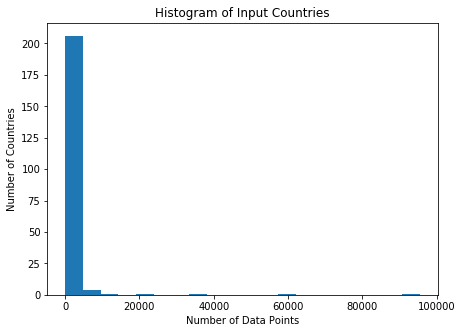

In [34]:
#Small number of countries represent most of the data
fig, ax = plt.subplots(1,1, figsize = (7, 5))
data['input country code'].value_counts().hist(grid = False, bins = 20, ax = ax)
ax.set_title("Histogram of Input Countries")
ax.set_xlabel("Number of Data Points")
ax.set_ylabel("Number of Countries");

In [51]:
#Top ten countries by number of data points
data['input country code'].value_counts()[0:10]

my    95531
cn    61705
tw    33856
sg    22606
au    10219
hk     8498
kr     7757
th     6402
jp     5974
gb     4110
Name: input country code, dtype: int64

### Primary Phone to Name

In [39]:
data['Primary Phone to Name'].value_counts() #Less than 1/3rd of the numbers in the data are associated with a name

No name found    215608
No match          48858
Match             24235
Name: Primary Phone to Name, dtype: int64

### Email to Name

In [42]:
data['Email to Name'].value_counts() #Less than 1/3rd of the emails in the data are associated with a name

No name found    259928
Match             23120
No match          15754
Name: Email to Name, dtype: int64

### Email First Seen Days

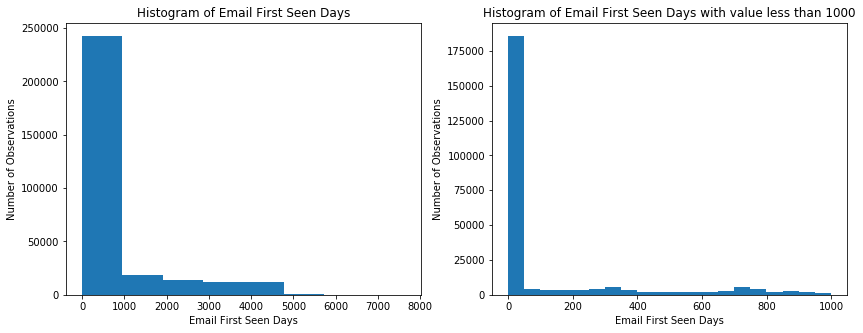

In [62]:
#Most (over 2/3rds) of email addresses were first recorded < 1000 days ago
fig, ax = plt.subplots(1,2, figsize = (14, 5))
data['Email First Seen Days'].hist(grid = False, bins = 8, ax = ax[0])
ax[0].set_title("Histogram of Email First Seen Days")
ax[0].set_xlabel("Email First Seen Days")
ax[0].set_ylabel("Number of Observations")
data['Email First Seen Days'][data['Email First Seen Days'] < 1000].hist(bins = 20, ax = ax[1], grid = False)
ax[1].set_title("Histogram of Email First Seen Days with value less than 1000")
ax[1].set_xlabel("Email First Seen Days")
ax[1].set_ylabel("Number of Observations");

### IP Distance from Address

Lots of missing data for this one...

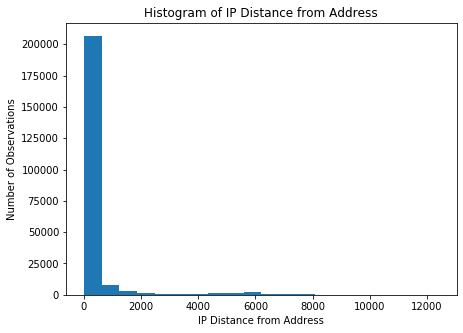

In [66]:
fig, ax = plt.subplots(1,1, figsize = (7, 5))
data['IP Distance From Address'].hist(grid = False, bins = 20, ax = ax)
ax.set_title('Histogram of IP Distance from Address')
ax.set_xlabel('IP Distance from Address')
ax.set_ylabel('Number of Observations');

### Transaction Risk Score

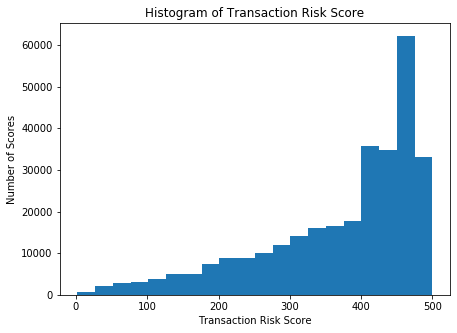

In [70]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
data['Transaction Risk Score'].hist(grid = False, bins = 20, ax = ax)
ax.set_title('Histogram of Transaction Risk Score')
ax.set_xlabel('Transaction Risk Score')
ax.set_ylabel('Number of Scores');

## Fraud Label Examinations

In [36]:
data['isfraud'].value_counts()

0    296619
1      3381
Name: isfraud, dtype: int64

In [111]:
#Fraud rate for entire dataset
total_fraud_rate = (len(data[data['isfraud'] == 1])/len(data))*100
total_fraud_rate

1.127

In [98]:
#Calculate fraud rates for each country
fraud_rates = pd.DataFrame(columns = ['Country', 'Fraud Rate', 'Number of Transactions'])
for each in data['input country code'].unique():
    fraud_rates = fraud_rates.append({'Country': each, 
                                      'Fraud Rate': (len(data[(data['isfraud'] == 1) & (data['input country code'] == each)])/len(data[data['input country code'] == each]))*100,
                                      'Number of Transactions': len(data[data['input country code'] == each])},
                                     ignore_index = True)   

In [99]:
fraud_rates.sort_values(by = 'Fraud Rate', ascending = False)[0:10]

,Country,Fraud Rate,Number of Transactions
204,to,100.000000,2
198,gd,100.000000,1
74,dz,64.361702,188
110,aw,58.646617,133
98,ad,50.704225,142
99,er,50.000000,2
9,om,42.452830,106
93,af,34.482759,145
163,td,33.333333,3
16,al,29.194631,298


In [85]:
#Correlation with other features
corrs1 = data.corr()['isfraud']
corrs2 = pd.get_dummies(data[['Primary Phone to Name', 'Email to Name']], dummy_na = True).corrwith(data['isfraud'])
corrs = pd.concat([corrs1, corrs2], axis = 0)
corrs.sort_values(ascending = False)

isfraud                                1.000000
Primary Phone to Name_nan              0.289710
IP Distance From Address               0.115551
Transaction Risk Score                 0.077387
Email to Name_nan                      0.013769
Email to Name_No match                 0.013088
Email to Name_No name found            0.009989
Email First Seen Days                 -0.006247
Email to Name_Match                   -0.026944
Primary Phone to Name_No match        -0.028276
Primary Phone to Name_Match           -0.031534
Primary Phone to Name_No name found   -0.080335
dtype: float64

### Thoughts for moving forward

For countries of interest:
1. Calculate amount (percent of total) of transactions represented by country
2. Calculate fraud rate and compare to total fraud rate
3. See if patterns in individual country data are similar to total data
4. Examine correlations of features (all and to fraud specifically)
5. Break up data into fraud/not-fraud categories and replot

In [136]:
def plot_continuous_histograms(data, sub_data, country):
    for feature in ['Email First Seen Days', 'IP Distance From Address', 'Transaction Risk Score']:
        fig, ax = plt.subplots(1, 2, figsize = (14, 5))
        data[feature].hist(grid = False, bins = 20, ax = ax[0])
        sub_data[feature].hist(grid = False, bins = 20, ax = ax[1])
        ax[0].set_title(f'Histogram of Total Data for {feature}')
        ax[1].set_title(f'Histogram of {country.upper()} Data for {feature}')
        ax[0].set_xlabel(feature)
        ax[1].set_xlabel(feature)
        ax[0].set_ylabel('Number of Observations')

In [154]:
def plot_categorical(data, sub_data, country):
    for feature in ['Primary Phone to Name', 'Email to Name']:
        fig, ax = plt.subplots(1, 2, figsize = (14, 5))
        sns.countplot(data[feature], ax = ax[0], order = ['No name found', 'Match', 'No match'])
        sns.countplot(sub_data[feature], ax = ax[1], order = ['No name found', 'Match', 'No match'])
        ax[0].set_title(f'Number of {feature} responses for All Data')
        ax[0].set_ylabel('Number of responses')
        ax[1].set_title(f'Number of {feature} responses for {country.upper()} Data')
        ax[1].set_ylabel('Number of responses')

In [144]:
def correlations(sub_data):
    sub_corrs1 = sub_data.corr()['isfraud']
    sub_corrs2 = pd.get_dummies(sub_data[['Primary Phone to Name', 'Email to Name']], dummy_na = True).corrwith(sub_data['isfraud'])
    sub_corrs = pd.concat([sub_corrs1, sub_corrs2], axis = 0)
    print("Feature correlations:")
    print(sub_corrs.sort_values(ascending = False)[1:])

In [140]:
def eda(data, country):
    sub_data = data[data['input country code'] == country]
    print(f"Number of {country.upper()} transactions: {len(sub_data)},\nProportion of total transactions: {round(len(sub_data)/len(data), 2)}")
    
    total_fraud_rate = (len(data[data['isfraud'] == 1])/len(data))*100
    sub_fraud_rate = (len(sub_data[sub_data['isfraud'] == 1])/len(sub_data))*100
    print(f"{country.upper()} fraud rate: {round(sub_fraud_rate, 3)}%, {round(((sub_fraud_rate - total_fraud_rate)/total_fraud_rate)*100, 2)}% different than average")
    
    plot_continuous_histograms(data, sub_data, country)
    plot_categorical(data, sub_data, country)
    
    correlations(sub_data)    

## EDA of data from China

Number of CN transactions: 61705,
Proportion of total transactions: 0.21
CN fraud rate: 1.23%, 9.14% different than average
Feature correlations:
Email to Name_No match                 0.153906
Email First Seen Days                  0.132070
Primary Phone to Name_nan              0.053536
Email to Name_nan                      0.005308
Transaction Risk Score                 0.004158
Primary Phone to Name_No match        -0.002441
IP Distance From Address              -0.002614
Primary Phone to Name_Match           -0.004451
Email to Name_Match                   -0.009943
Primary Phone to Name_No name found   -0.048593
Email to Name_No name found           -0.091549
dtype: float64


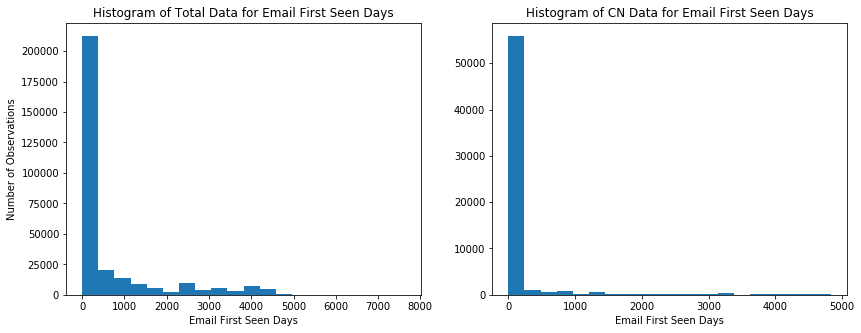

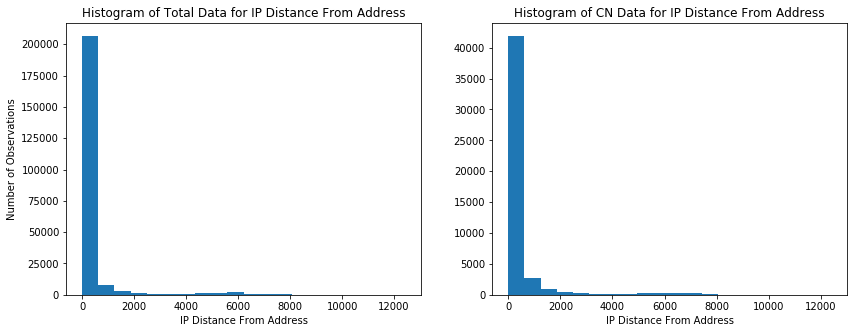

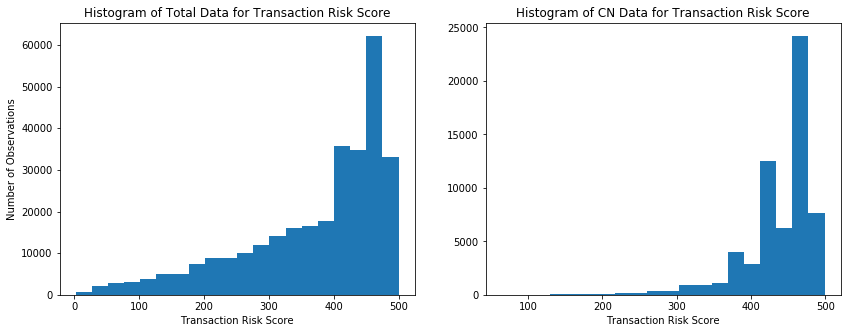

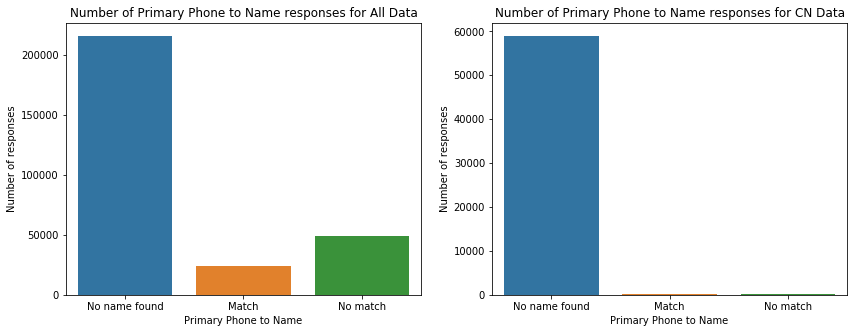

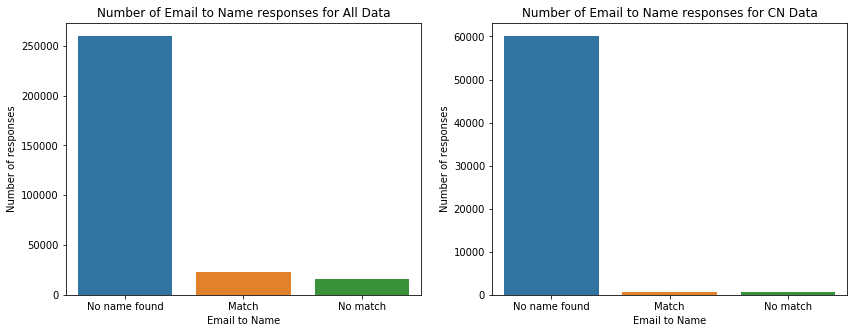

In [155]:
eda(data, 'cn')

## EDA of data from Malaysia

Number of MY transactions: 95531,
Proportion of total transactions: 0.32
MY fraud rate: 0.18%, -84.02% different than average
Feature correlations:
Email to Name_No match                 0.043313
Email First Seen Days                  0.023721
Primary Phone to Name_No name found    0.016596
Primary Phone to Name_nan              0.010746
Transaction Risk Score                 0.007366
Email to Name_nan                     -0.002227
Primary Phone to Name_No match        -0.004738
IP Distance From Address              -0.006875
Email to Name_Match                   -0.008394
Primary Phone to Name_Match           -0.019025
Email to Name_No name found           -0.022720
dtype: float64


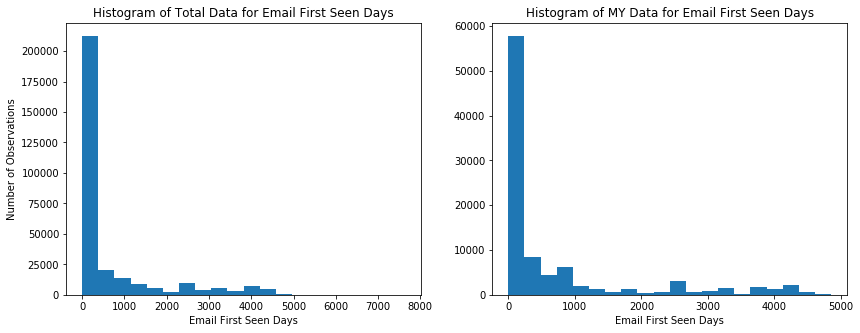

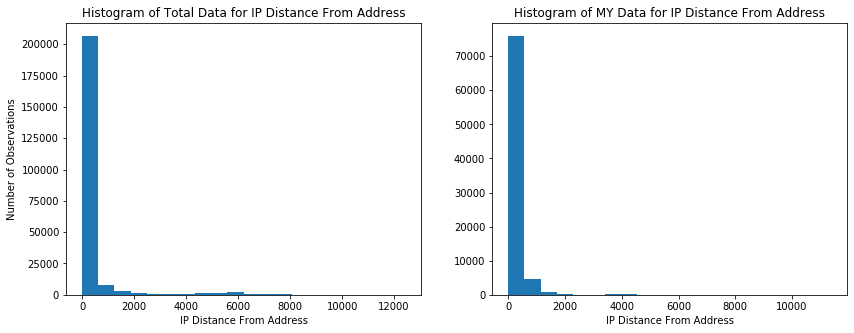

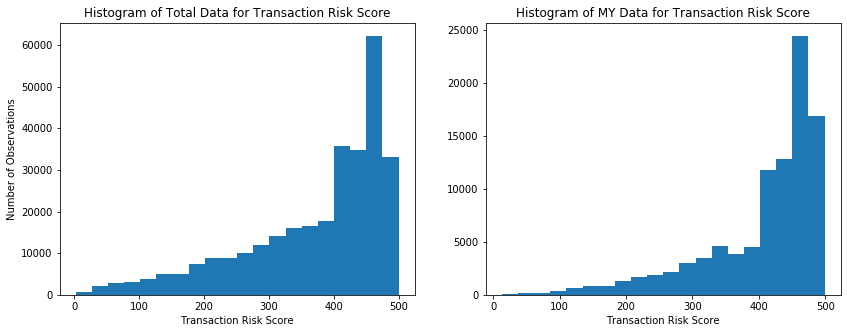

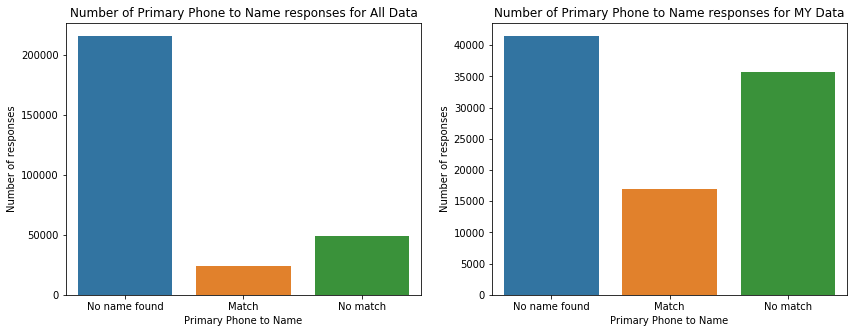

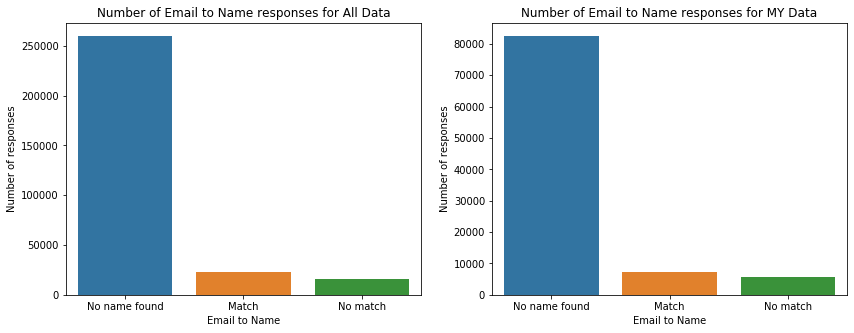

In [150]:
eda(data, 'my')

## EDA of data from Hong Kong

Number of HK transactions: 8498,
Proportion of total transactions: 0.03
HK fraud rate: 5.378%, 377.17% different than average
Feature correlations:
Primary Phone to Name_nan              0.557644
Transaction Risk Score                 0.344551
IP Distance From Address               0.142181
Email to Name_No name found            0.102393
Email to Name_nan                     -0.003318
Email to Name_No match                -0.036731
Primary Phone to Name_Match           -0.066879
Primary Phone to Name_No match        -0.070491
Email to Name_Match                   -0.093647
Email First Seen Days                 -0.145439
Primary Phone to Name_No name found   -0.289156
dtype: float64


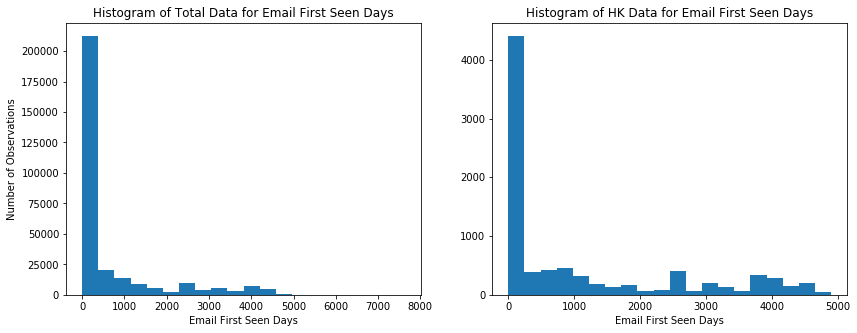

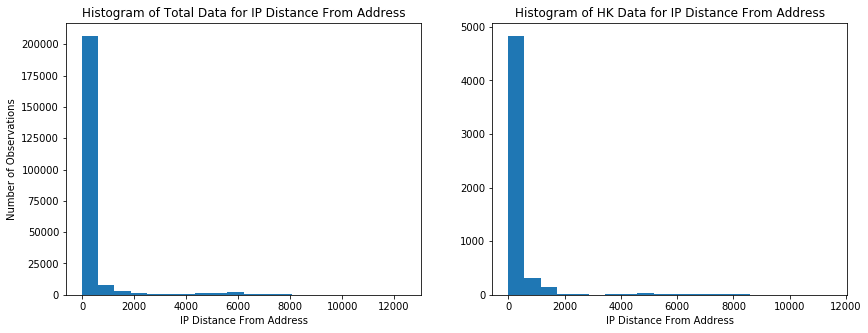

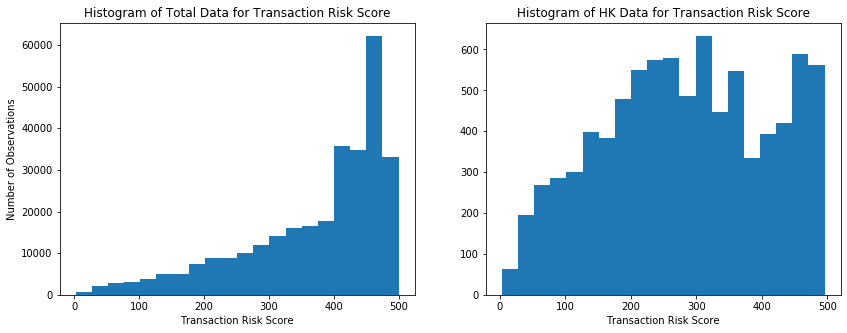

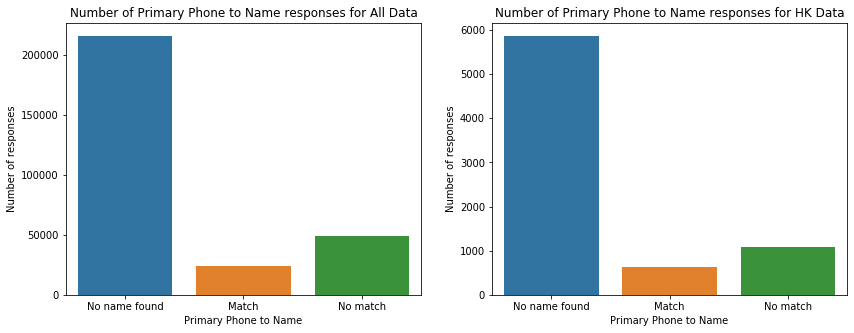

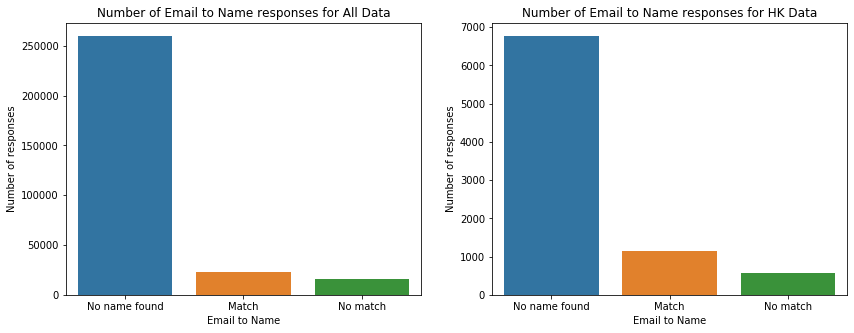

In [151]:
eda(data, 'hk')

## Breaking up fraud/not fraud data

In [47]:
def continuous_plotting_label(x):
    if type(x) == str:
        return x
    else:
        return f"{int(round(x.left))}-{int(round(x.right))}"

In [44]:
def split_continuous(data, feature, bins):
    
    #Add bins for continous features
    data['feature_bin'] = pd.cut(data[feature], bins = bins)
    #Add a bin for missing data specifically
    data['feature_bin'].cat.add_categories(['Missing'], inplace = True)
    #NaN = 'Missing'
    data['feature_bin'].fillna('Missing', inplace = True)
    data[feature].fillna('Missing', inplace = True)
    #Get number of observations in each bin
    count_notfraud = data[data['isfraud'] == 0].groupby('feature_bin')[feature].count()
    #Calculate the percent of observations in each bin  
    percent_notfraud = []
    for num in count_notfraud:
        percent_notfraud.append((num/sum(count_notfraud))*100)
    #Make new dataframe of counts and percentages
    binned_notfraud = pd.concat([pd.DataFrame(count_notfraud).reset_index(), 
                                 pd.DataFrame(percent_notfraud, columns = ['Percent'])], axis = 1)
    #Add column for fraud label
    binned_notfraud['isfraud'] = ['Not Fraud']*len(binned_notfraud)
    #Add column for the max of each bin interval
    binned_notfraud['binmax'] = binned_notfraud['feature_bin'].apply(continuous_plotting_label) #(lambda x: int(round(x.right)))
    
    #Repeat process for fraudulent data
    count_fraud = data[data['isfraud'] == 1].groupby('feature_bin')[feature].count()
    percent_fraud = []
    for num in count_fraud:
        percent_fraud.append((num/sum(count_fraud))*100)
    binned_fraud = pd.concat([pd.DataFrame(count_fraud).reset_index(), 
                              pd.DataFrame(percent_fraud, columns = ['Percent'])], axis = 1)
    binned_fraud['isfraud'] = ['Fraud']*len(binned_fraud)
    binned_fraud['binmax'] = binned_fraud['feature_bin'].apply(continuous_plotting_label) #(lambda x: int(round(x.right)))
    #Merge two dataframes
    df = pd.concat([binned_notfraud, binned_fraud], axis = 0)
    
    return df

In [15]:
def split_categorical(data, feature):
    #Replace missing data with a missing label
    data[feature].fillna('Not Submitted', inplace = True)
    #Get number of observations in each category
    count_notfraud = data[data['isfraud'] == 0].groupby(feature)[feature].count()
    #Calculate the percent of observations in each category  
    percent_notfraud = []
    for num in count_notfraud:
        percent_notfraud.append((num/sum(count_notfraud))*100)
    #Make new dataframe of counts and percentages
    binned_notfraud = pd.concat([pd.DataFrame(count_notfraud).rename({f'{feature}': 'counts'}, axis = 1).reset_index(), 
                                 pd.DataFrame(percent_notfraud, columns = ['Percent'])], axis = 1)
    #Add column for fraud label
    binned_notfraud['isfraud'] = ['Not Fraud']*len(binned_notfraud)
    
    #Repeat process for fraudulent data
    count_fraud = data[data['isfraud'] == 1].groupby(feature)[feature].count()
    percent_fraud = []
    for num in count_fraud:
        percent_fraud.append((num/sum(count_fraud))*100)
    binned_fraud = pd.concat([pd.DataFrame(count_fraud).rename({f'{feature}': 'counts'}, axis = 1).reset_index(), 
                              pd.DataFrame(percent_fraud, columns = ['Percent'])], axis = 1)
    binned_fraud['isfraud'] = ['Fraud']*len(binned_fraud)
    #Merge two dataframes
    df = pd.concat([binned_notfraud, binned_fraud], axis = 0)
    
    return df

In [48]:
def plot_continuous_splitdata(split_data, feature, country):
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    sns.barplot(data = split_data, x = 'binmax', y = 'Percent', hue = 'isfraud', ax = ax);
    plt.xticks(rotation=90)
    ax.set_xlabel(f'{feature}')
    ax.set_title(f'Percent of fraudulent/nonfraudulent {feature} in {country.upper()}')
    ax.legend();

In [11]:
def plot_categorical_splitdata(split_data, feature, country):
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    sns.barplot(data = split_data, x = feature, y = 'Percent', hue = 'isfraud', ax = ax);
    ax.set_xlabel(f'{feature}')
    ax.set_title(f'Percent of fraudulent/nonfraudulent {feature} in {country.upper()}')
    ax.legend();

In [12]:
def split_and_plot(data, country):
    sub_data = data[data['input country code'] == country]
    
    #Split continuous data and plot
    for feature in ['Email First Seen Days', 'IP Distance From Address', 'Transaction Risk Score']:
        plot_continuous_splitdata(split_continuous(sub_data, feature, 20), feature, country)
    
    #Split categorical data and plot
    for feature in ['Primary Phone to Name', 'Email to Name']:
        plot_categorical_splitdata(split_categorical(sub_data, feature), feature, country)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

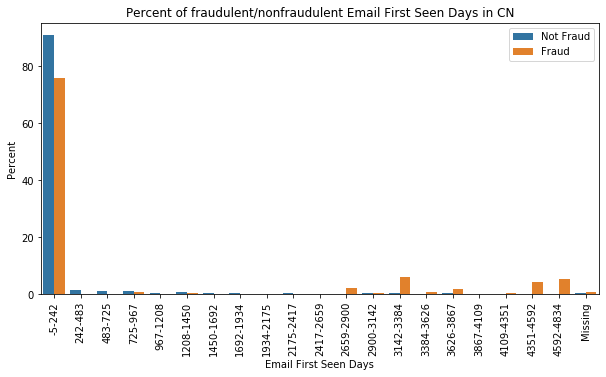

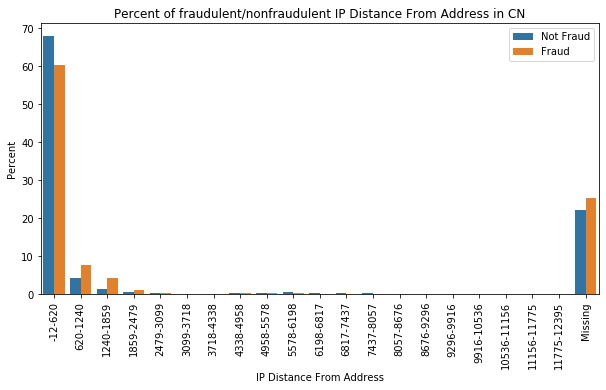

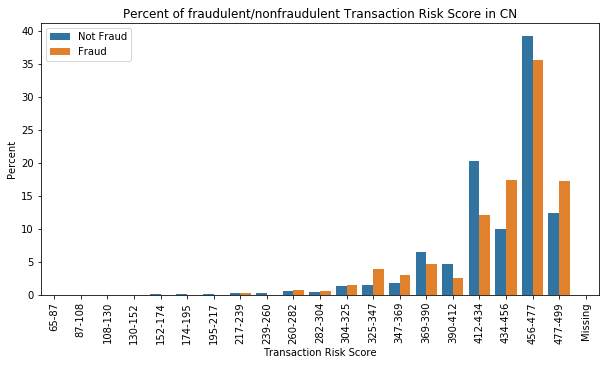

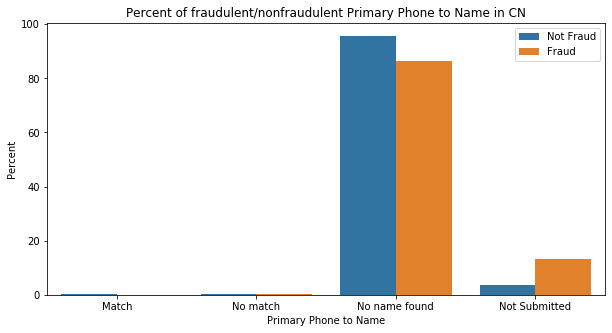

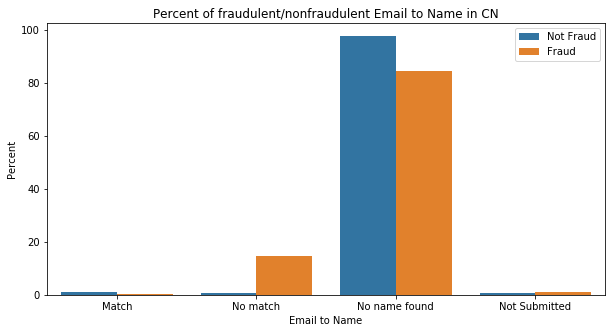

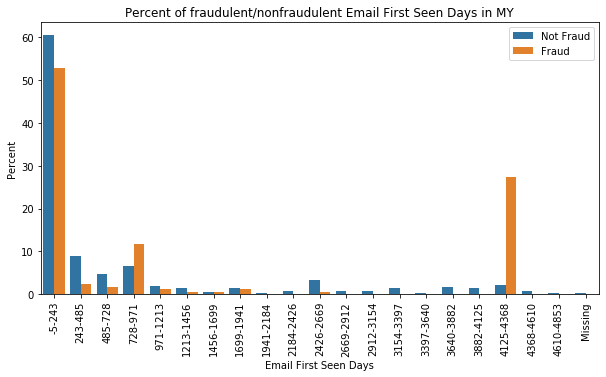

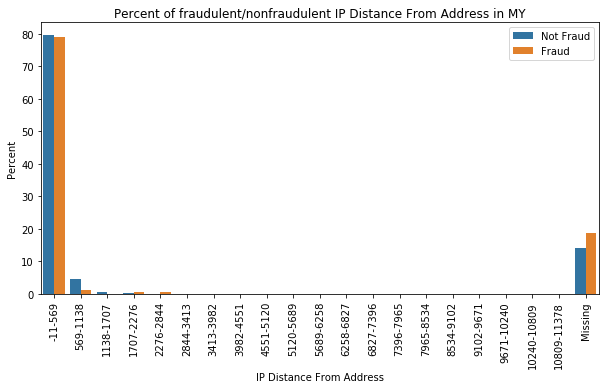

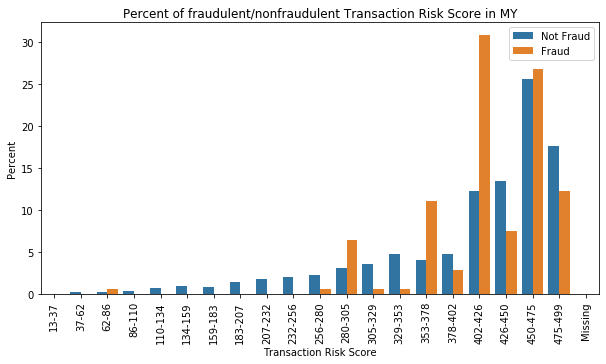

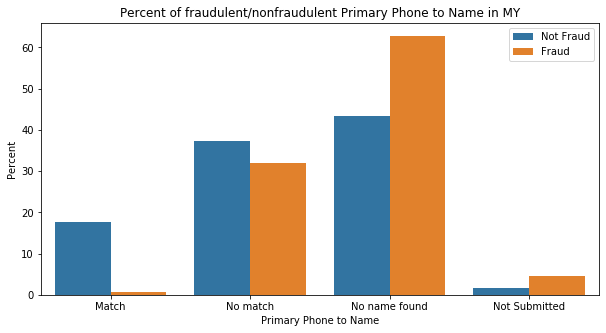

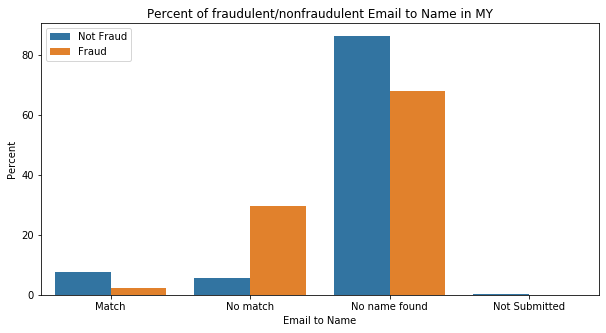

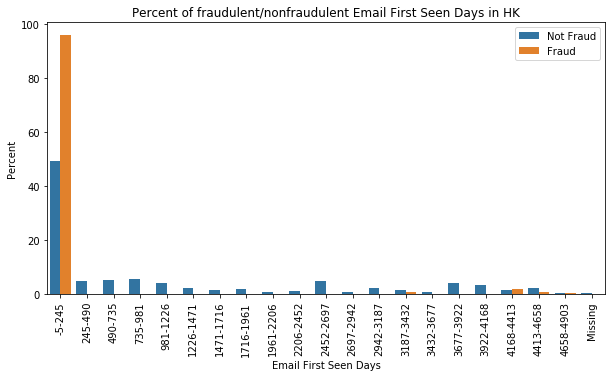

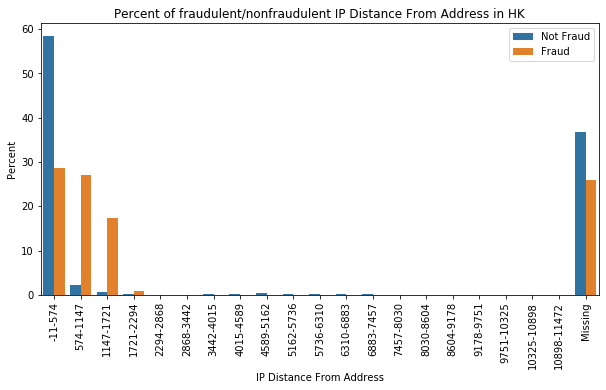

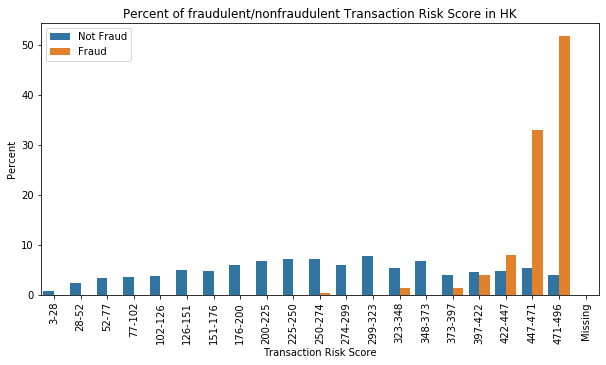

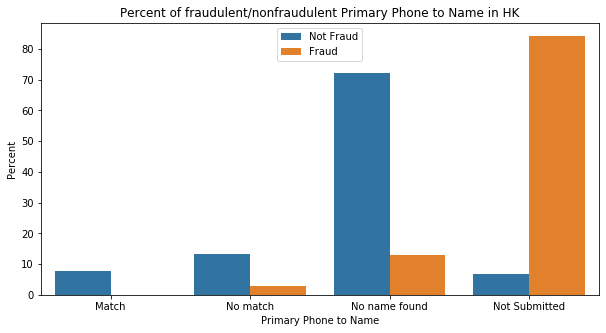

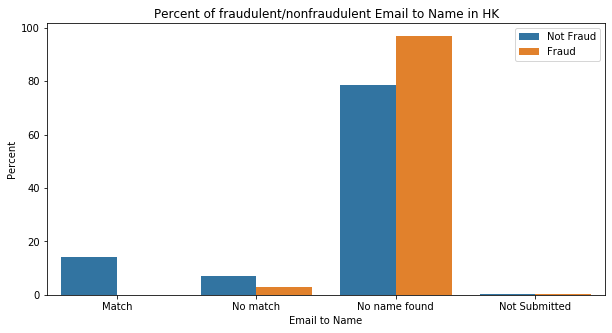

In [49]:
for country in ['cn', 'my', 'hk']:
    split_and_plot(data, country)

## Features to Highlight for Each Country

### China
1. Transaction Risk Score
2. Email to Name
3. Email First Seen Days

### Malaysia
1. Email First Seen Days
2. Primary Phone to Name
3. Email to Name

### Hong Kong
1. IP Distance from Address
2. Transaction Risk Score
3. Primary Phone to Name (missing)